   Time (s)  Frequency(Hz)  Amplitude(V)  Phase(deg)
0       0.0   11384.384766      0.705994   58.536942
1       0.0   11385.641602      0.738800   54.999237
2       0.0   11386.897461      0.772919   45.188148
3       0.0   11388.154297      0.639069   57.811821
4       0.0   11389.411133      0.661377   57.954651
0      11390.039062
1      11391.295605
2      11392.552051
3      11393.808594
4      11395.065137
           ...     
986    12628.959668
987    12630.216113
988    12631.472656
989    12632.729199
990    12633.985645
Name: Frequency(Hz), Length: 991, dtype: float64 0      0.699957
1      0.699826
2      0.691165
3      0.680142
4      0.692084
         ...   
986    1.329184
987    1.338763
988    1.336926
989    1.337714
990    1.348212
Name: Amplitude(V), Length: 991, dtype: float64
(11391.29560546875, 0.6998260498046875) (12633.98564453125, 1.348211669921875)
0.0005217597306938554 -5.243693277558785


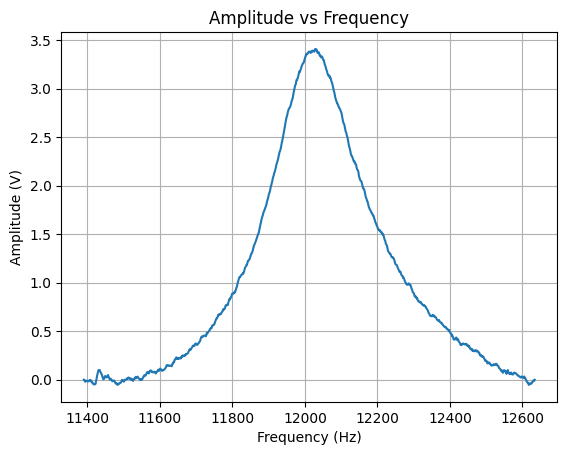

(12028.34697265625, 147.01171875, 81.81896705194633)

In [18]:
# Re-evaluating the data analysis process

import matplotlib.pyplot as plt
import pandas as pd
def moving_average(series, window_size):
	return series.rolling(window=window_size).mean()[window_size - 1:].reset_index(drop=True)

def fit_line(point1, point2):
	x1, y1 = point1
	x2, y2 = point2
	
	# Calculate the slope (m)
	m = (y2 - y1) / (x2 - x1)
	
	# Calculate the y-intercept (b)
	b = y1 - m * x1
	
	return m, b

data = pd.read_csv('thermaresonancefreq12khz.txt', delimiter='\t', header=173)  # Adjust the delimiter as needed
print(data.head())
# Extract frequency and amplitude columns
frequency = moving_average(data['Frequency(Hz)'],10)
amplitude =  moving_average(data['Amplitude(V)'],10)

left_point = (frequency[1], amplitude[1])
print(frequency, amplitude)
right_point = (frequency.iloc[-1], amplitude.iloc[-1])
print(left_point, right_point)
slope,intercept = fit_line(left_point, right_point)
print(slope, intercept)
amplitude = amplitude - (slope * frequency + intercept)

# Plot the amplitude versus frequency to visually inspect the data

plt.plot(frequency, amplitude)

plt.title("Amplitude vs Frequency")

plt.xlabel("Frequency (Hz)")

plt.ylabel("Amplitude (V)")

plt.grid(True)

plt.show()
 
# Find the resonance frequency (f0) - this is the frequency at the peak amplitude

f0_index = amplitude.idxmax()

f0 = frequency[f0_index]

max_amplitude = amplitude[f0_index]
 
# Finding the bandwidth at half maximum (Δf) - Full Width at Half Maximum (FWHM)

half_max = max_amplitude / 2
 
# Identify the frequencies where the amplitude crosses the half maximum

left_half_max_index = amplitude[(amplitude > half_max) & (frequency < f0)].idxmin()

right_half_max_index = amplitude[(amplitude > half_max) & (frequency > f0)].idxmax()
 
left_half_max = frequency[left_half_max_index]

right_half_max = frequency[right_half_max_index]
 
# Calculating Δf

delta_f = right_half_max - left_half_max
 
# Calculating the Q factor

Q_factor = f0 / delta_f
 
f0, delta_f, Q_factor
 

In [16]:
data = pd.read_csv('thermaresonancefreq12khz.txt', delimiter='\t', header=173)  # Adjust the delimiter as needed
# print(data.head())
data.shape

(1000, 4)